<a href="https://colab.research.google.com/github/rajagopalmotivate/try1/blob/master/DCGAN_for_odd_sized_images_ver12b%20Thank%20you%20LORD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is ensemble of 2 identical G

this step is to train each G seperately 

once each G generates meaniful results, then ensemble them

the way to train seperate is 
1) seperate train and load weights 
2) train with Avg (same G)


In [6]:
from IPython.display import Image
from keras.utils import plot_model
# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Double check with Python 3


In [0]:
from IPython.display import Image
from keras.utils import plot_model

In [0]:
# Restart runtime to allow Jupyter to know the changes above
import os
#os._exit(0)

In [0]:
from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate, Average, merge
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Model
from keras.optimizers import Adam
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from google.colab import files
import copy 

In [0]:
def load_dataold():
    (X_train, _), (_, _) = fashion_mnist.load_data()
    X_train = (X_train.astype(np.float32) - 127.5) / 127.5
    X_train = np.expand_dims(X_train, axis=3)
    return X_train

In [0]:
def load_large_data():
    (X_train1, _), (_, _) = mnist.load_data()
    (X_train2, _), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([10000,28,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 100):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([28,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage2
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*100 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 1000])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

In [0]:
def load_large_data5656():
    (X_train1, _), (_, _) = mnist.load_data()
    (X_train2, _), (_, _) = fashion_mnist.load_data()
    
    X_trainlarge = np.zeros([10000,56,56],dtype=np.uint8)
    
    for i in range(0, 100):
      for j in range(0, 100):    
          aimage1 = X_train2[i]
          aimage2 = X_train2[j]
          largeimage =  np.zeros([56,56],dtype=np.uint8)
          largeimage[0:28, 0:56] = 40
          largeimage[0:28, 0:28] = aimage2
          largeimage[0:28, 28:56] = aimage1
          X_trainlarge[i*100 + j] = largeimage
 
    
    fig=plt.figure(figsize=(16, 16))
    for i in range(0, 10):
      for j in range(0, 10):
          fig.add_subplot(10, 10, i*10 + j +1)
          plt.imshow(X_trainlarge[i*100 + j + 1000])
  ##plt.show()
    
    print(X_train2.shape)
    print(X_trainlarge.shape)
    
    plt.imshow(aimage1)
    plt.show()  
 
    plt.imshow(aimage2)
    plt.show()
    
    plt.imshow(largeimage, interpolation='none')
    plt.show()
    

    X_trainlarge = (X_trainlarge.astype(np.float32) - 127.5) / 127.5
    X_trainlarge = np.expand_dims(X_trainlarge, axis=3)


    return X_trainlarge

(60000, 28, 28)
(10000, 28, 56)


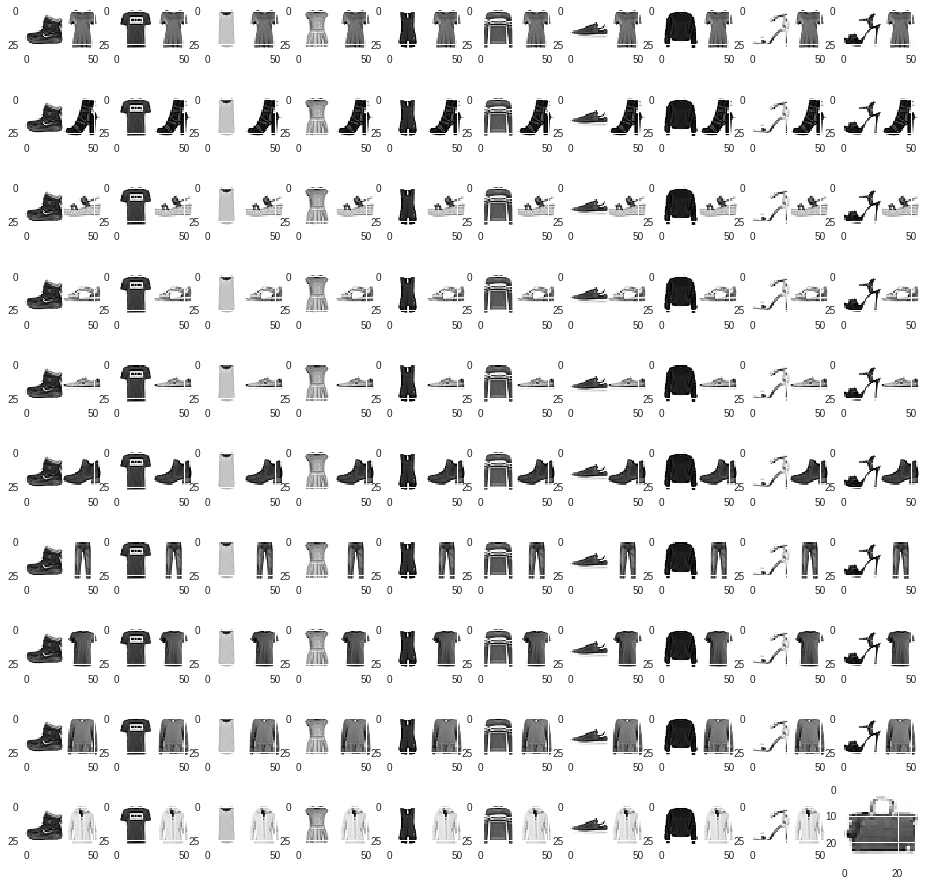

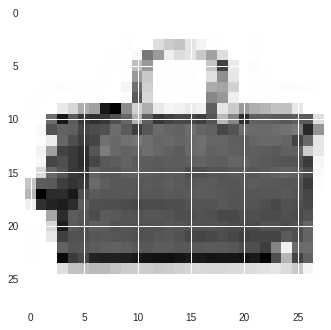

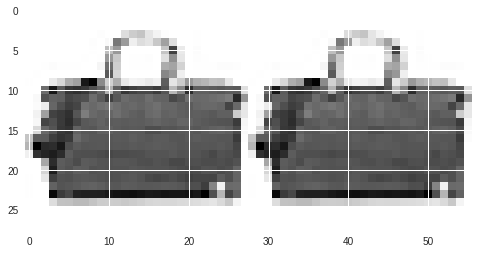

In [33]:
X_trainlarge = load_large_data()

In [0]:
X_trainlarge5656 = load_large_data5656()

In [0]:
def load_databydatasetname(datasetname):
  if (datasetname == 1):   
    (X_train, _), (_, _) = mnist.load_data()
  if (datasetname == 2):   
    (X_train, _), (_, _) = fashion_mnist.load_data()
  if (datasetname == 3):   
     X_train = X_trainlarge
  if (datasetname == 4):   
     X_train = X_trainlarge5656

  X_train = (X_train.astype(np.float32) - 127.5) / 127.5
  X_train = np.expand_dims(X_train, axis=3)
  return X_train
  

In [0]:
def build_generator(noise_shape=(100,)):
    input = Input(noise_shape)
    x = Dense(128 * 7 * 7, activation="relu")(input)
    x = Reshape((7, 7, 128))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, kernel_size=3, padding="same")(x)
    out = Activation("tanh")(x)
    model = Model(input, out)
    print("-- Generator -- ")
    model.summary()
    return model

In [0]:
def build_discriminator(img_shape):
    input = Input(img_shape)
    x =Conv2D(32, kernel_size=3, strides=2, padding="same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
    x = (LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(256, kernel_size=3, strides=1, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(input, out)
  #  print("-- Discriminator -- ")
   # model.summary()
    return model

In [0]:
def build_discriminator2856(img_shape):
    input = Input(img_shape)
    x =Conv2D(32, kernel_size=3, strides=2, padding="same")(input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = ZeroPadding2D(padding=((0, 1), (0, 1)))(x)
    x = (LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(128, kernel_size=3, strides=2, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(256, kernel_size=3, strides=1, padding="same")(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    out = Dense(1, activation='sigmoid')(x)

    model = Model(input, out)
    print("-- Discriminator -- ")
    model.summary()
    return model

In [0]:
def save_imgs(generator, epoch, batch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    ##fig.savefig("images/mnist_%d_%d.png" % (epoch, batch))
    plt.show()
    plt.close()

In [0]:
def build_generator_model():

    gen_optimizer = Adam(lr=0.0002, beta_1=0.5)
 
    generator = build_generator()
    generator.compile(loss='binary_crossentropy', optimizer=gen_optimizer)

  
    return generator

In [0]:


def plotamodel(amodel, showdetails=True):
  # Model summary
  print(amodel.summary())

  if (showdetails==True):
    # Plot model graph
    plot_model(amodel, show_shapes=True, show_layer_names=True, to_file='model.png')
    #Image(retina=True, filename='model.png')
  if (showdetails==False):
    # Plot model graph
    plot_model(amodel, show_shapes=False, show_layer_names=False, to_file='modelsmall.png')
   # Image(retina=True, filename='modelsmall.png')

In [0]:
def build_classifier_model():

    disc_optimizer = Adam(lr=0.0002, beta_1=0.5)


    discriminator = build_discriminator(img_shape=(28, 28, 1))
    discriminator.compile(loss='binary_crossentropy',
                               optimizer=disc_optimizer,
                               metrics=['accuracy'])


    return  discriminator

In [0]:
def train(generator1, generator2, discriminator, combined, mergedmodel,  epochs=2000, batch_size=128, save_interval=50, modeltotrain=1):

    X_train = load_databydatasetname(2)
    X_train5656 = None
    
    if modeltotrain == 3:
          X_train5656 = load_databydatasetname(3)

    num_examples = X_train.shape[0] / 10
    num_batches = int(num_examples / float(batch_size))
    print('Number of examples: ', num_examples)
    print('Number of Batches: ', num_batches)
    print('Number of epochs: ', epochs)

    half_batch = int(batch_size / 2)
    ##quater_batch = int(half_batch / 2) 

    for epoch in range(epochs + 1):
        for batch in range(num_batches):

            # noise images for the batch
            noise1 = np.random.normal(0, 1, (half_batch, 100))
            fake_images1 = generator1.predict(noise1)
            fake_labels1 = np.zeros((half_batch, 1))
            
           ## noise2 = np.random.normal(0, 1, (half_batch, 100))
            noise2 = copy.deepcopy(noise1)
            fake_images2 = generator2.predict(noise2)
            fake_labels2 = np.zeros((half_batch, 1))
            
        
            
           ## fake_images = np.append(fake_images1 , fake_images2, axis=0)
           ## fake_labels = np.append( fake_labels1 , fake_labels2, axis=0)
            
            if modeltotrain == 1:
              fake_images = fake_images1
              fake_labels = fake_labels1
            if modeltotrain == 2:
              fake_images = fake_images2
              fake_labels = fake_labels2
            if modeltotrain == 3:
              noise2 = copy.deepcopy(noise1)
              fake_images3 = mergedmodel.predict(noise2)
              fake_labels3 = np.zeros((half_batch, 1))    
              fake_images = fake_images3
              fake_labels = fake_labels3              
            
            if(batch == 0):
              print("G1 output numpy array shape")
              print(fake_images1.shape)
              print("G1+G2 appended numpy array shape")
              print(fake_images.shape)

            X_train = X_trainlarge
            # real images for batch
            idx = np.random.randint(0, X_train.shape[0], half_batch)            
            real_images = X_train[idx]
            real_labels = np.ones((half_batch, 1))

            # Train the discriminator (real classified as ones and generated as zeros)
            d_loss_real = discriminator.train_on_batch(real_images, real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, (batch_size, 100))
            # Train the generator
            g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

            # Plot the progress
            print("Epoch %d Batch %d/%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (epoch,batch, num_batches, d_loss[0], 100 * d_loss[1], g_loss))

            if batch % 100 == 0:
                 save_imgs(generator1, epoch, batch)
            if batch % 101 == 0:
                 save_imgs(generator2, epoch, batch)
            if batch % 102 == 0:
                 save_imgs(mergedmodel, epoch, batch)
                








In [0]:
def build_combined_model():

    discriminatormymodel = build_classifier_model

    generatormymodel = build_generator_model()
   
    optimizer1 = Adam(lr=0.0002, beta_1=0.5)


    z = Input(shape=(100,))
    img = generatormymodel(z)
    discriminatormymodel.trainable = False
    real = discriminatormymodel(img)
    
    combined = Model(z, real)
    
    combined.compile(loss='binary_crossentropy', optimizer=optimizer1)
    return combined

In [0]:
def getlastlayer(amodel):
  for layer in amodel.layers:
    layerlast = layer
  print(layer)
  print(layer.get_config())
  print(layer.input)
  print(layer.input_shape)
  print(layer.output)
  print('output shape of last is ')
  print(layer.output_shape)
  return layer

In [0]:
def build_models():

    gen1_optimizer = Adam(lr=0.0002, beta_1=0.5)
    gen2_optimizer = Adam(lr=0.0002, beta_1=0.5)
    disc_optimizer = Adam(lr=0.0002, beta_1=0.5)


    discriminator = build_discriminator(img_shape=(28, 28, 1))
    discriminator.compile(loss='binary_crossentropy', optimizer=disc_optimizer,  metrics=['accuracy'])

    generator1 = build_generator()
    
    generator2 = build_generator()

    z = Input(shape=(100,))
    img1 = generator1(z)
    img2 = generator2(z)
    merged = Average(getlastlayer(img1).output, getlastlayer(img2).output)
    
    mergedmodel = Model(z, merged)
    
    discriminator.trainable = False
    real = discriminator(merged)
    combined = Model(z, real)
    
    combined.summary()
    
    generator1.compile(loss='binary_crossentropy', optimizer=gen1_optimizer)
    generator2.compile(loss='binary_crossentropy', optimizer=gen2_optimizer)
    
    combined.compile(loss='binary_crossentropy', optimizer=gen_optimizer)
    return generator, discriminator, combined, mergedmodel

In [0]:
def build_modelsNEW(averagemode = 1, loadpretrainedweights=False):
    z = Input(shape=(100,))
    inputz = z
    x = Dense(128 * 7 * 7, activation="relu")(inputz)
    x = Reshape((7, 7, 128))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(128, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = UpSampling2D()(x)
    x = Conv2D(64, kernel_size=3, padding="same")(x)
    x = Activation("relu")(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Conv2D(1, kernel_size=3, padding="same")(x)
    out = Activation("tanh")(x)    
    generator1 = Model(inputz, out)
    
    inputz2 = z
    x1 = Dense(128 * 7 * 7, activation="relu")(inputz2)
    x1 = Reshape((7, 7, 128))(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(128, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = UpSampling2D()(x1)
    x1 = Conv2D(64, kernel_size=3, padding="same")(x1)
    x1 = Activation("relu")(x1)
    x1 = BatchNormalization(momentum=0.8)(x1)
    x1 = Conv2D(1, kernel_size=3, padding="same")(x1)
    out1 = Activation("tanh")(x1)    
    generator2 = Model(inputz2, out1)
    
    
    img1 = generator1(z)
    img2 = generator2(z)
    
    
    aoptimizer = Adam(lr=0.0002, beta_1=0.5)   
    discriminator = build_discriminator(img_shape=(28, 56, 1))
    discriminator.compile(loss='binary_crossentropy', optimizer=aoptimizer,  metrics=['accuracy'])
    
    if(averagemode == 1):
          models = [generator1, generator1]
    if(averagemode == 2):
          models = [generator1, generator1]
    if(averagemode == 3):
          models = [generator1, generator2]


  ##  models = [generator1, generator2]
 ##   models = [generator1, generator1]
    outputs = [model.outputs[0] for model in models]
    for obj1 in outputs:
      print(type(obj1))
      print(obj1.shape)
        
    mergedlayer = Concatenate(axis=2)(outputs)
    ##x = merge([lstm_out, auxiliary_input], mode='concat')
   ## output = merge([tower_1, tower_2, tower_3], mode='concat', concat_axis=1)
  #  mergedlayer = merge([generator1, generator2], mode='concat', concat_axis=1)
  
   #mergedlayer = merge([out1, out], mode='concat', concat_axis=1)
#contact axis can be -1 to 0 , 1 for inception , 2 , 3 or remove it
  #  mergedlayer = merge([generator1, generator1])

    print('merge layers')
    print(out1.shape)
    print(out.shape)
    print(mergedlayer.shape)

  

    
    
    mergedmodel = Model(z, mergedlayer)
    
    discriminator.trainable = False
    real = discriminator(mergedlayer)
    combined = Model(z, real)
        

    
    if(loadpretrainedweights==True):
     # generator1 = generator1.load_weights('generator2fmnist.h5')
     # generator2 = generator2.load_weights('generator2fmnist.h5')
      generator1 = load_model('generator2fmnist.h5')
      generator2 = load_model('generator2fmnist.h5')
      

    generator1.compile(loss='binary_crossentropy', optimizer=aoptimizer)
    generator2.compile(loss='binary_crossentropy', optimizer=aoptimizer)  
    combined.compile(loss='binary_crossentropy', optimizer=aoptimizer) 
  
    plotamodel(mergedmodel)
   # plotamodel(combined)
    
    return generator1, generator2, discriminator, combined ,  mergedmodel

In [28]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 1 ,  loadpretrainedweights=False)




    
    

    


<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 28, 28, 1)
merge layers
(?, 28, 28, 1)
(?, 28, 28, 1)
(?, 28, 56, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6272)         633472      input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 7, 7, 128)    0           dense_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 

In [29]:
plotamodel(combined)
files.download('model.png')




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 6272)         633472      input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 7, 7, 128)    0           dense_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 7, 7, 128)    512         reshape_1[0][0]                  
__________________________________________________________________________________________________
up_samplin

In [30]:
plotamodel(discriminator)
files.download('model.png')




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 56, 1)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 28, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 14, 64)         18496     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 8, 15, 64)         0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 15, 64)         0         
__________

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


In [0]:
#train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=2)

Number of examples:  6000.0
Number of Batches:  187
Number of epochs:  2
G1 output numpy array shape
(16, 28, 28, 1)
G1+G2 appended numpy array shape
(16, 28, 56, 1)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 0 Batch 0/187 [D loss: 1.027478, acc.: 46.88%] [G loss: 0.436886]


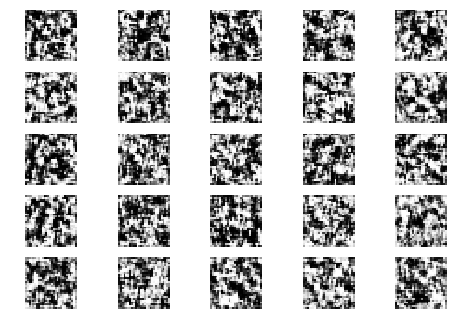

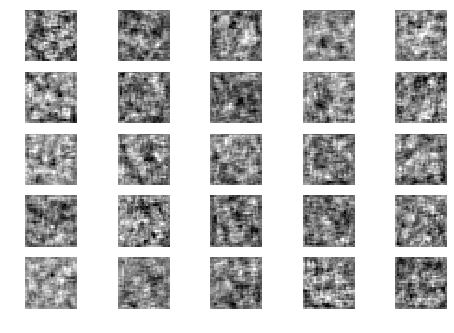

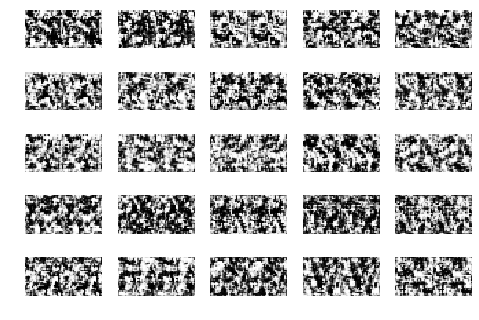

Epoch 0 Batch 1/187 [D loss: 0.681057, acc.: 62.50%] [G loss: 0.481457]
Epoch 0 Batch 2/187 [D loss: 0.524856, acc.: 71.88%] [G loss: 0.834694]
Epoch 0 Batch 3/187 [D loss: 0.638532, acc.: 65.62%] [G loss: 1.033606]
Epoch 0 Batch 4/187 [D loss: 0.512122, acc.: 75.00%] [G loss: 1.211646]
Epoch 0 Batch 5/187 [D loss: 0.331252, acc.: 87.50%] [G loss: 1.187522]
Epoch 0 Batch 6/187 [D loss: 0.480088, acc.: 75.00%] [G loss: 1.486684]
Epoch 0 Batch 7/187 [D loss: 0.311087, acc.: 90.62%] [G loss: 1.599746]
Epoch 0 Batch 8/187 [D loss: 0.406004, acc.: 78.12%] [G loss: 1.627776]
Epoch 0 Batch 9/187 [D loss: 0.269620, acc.: 93.75%] [G loss: 1.396931]
Epoch 0 Batch 10/187 [D loss: 0.423449, acc.: 84.38%] [G loss: 1.508187]
Epoch 0 Batch 11/187 [D loss: 0.383936, acc.: 84.38%] [G loss: 1.846371]
Epoch 0 Batch 12/187 [D loss: 0.307097, acc.: 87.50%] [G loss: 1.149062]
Epoch 0 Batch 13/187 [D loss: 0.412328, acc.: 87.50%] [G loss: 1.694921]
Epoch 0 Batch 14/187 [D loss: 0.319312, acc.: 90.62%] [G los

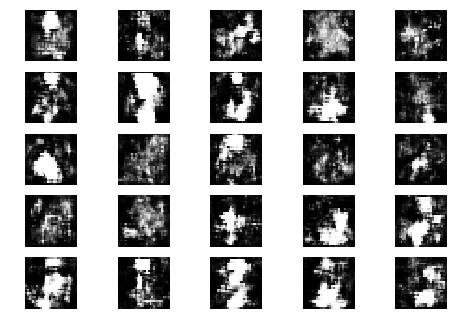

Epoch 0 Batch 101/187 [D loss: 0.626605, acc.: 68.75%] [G loss: 3.009638]


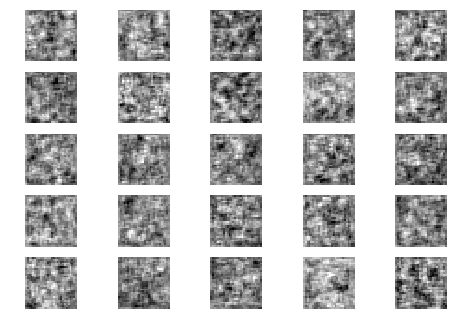

Epoch 0 Batch 102/187 [D loss: 1.419900, acc.: 43.75%] [G loss: 3.105432]


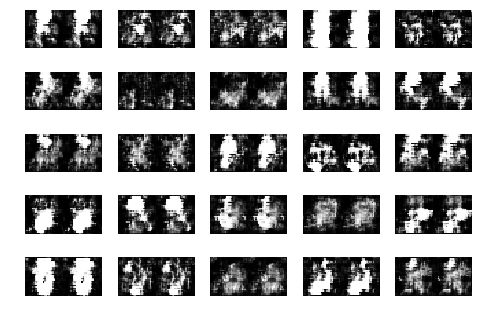

Epoch 0 Batch 103/187 [D loss: 0.647976, acc.: 62.50%] [G loss: 3.582007]
Epoch 0 Batch 104/187 [D loss: 0.592666, acc.: 71.88%] [G loss: 1.901870]
Epoch 0 Batch 105/187 [D loss: 0.747598, acc.: 62.50%] [G loss: 3.399444]
Epoch 0 Batch 106/187 [D loss: 0.619631, acc.: 75.00%] [G loss: 3.674554]
Epoch 0 Batch 107/187 [D loss: 0.599897, acc.: 78.12%] [G loss: 1.346476]
Epoch 0 Batch 108/187 [D loss: 0.389794, acc.: 78.12%] [G loss: 2.434934]
Epoch 0 Batch 109/187 [D loss: 0.252930, acc.: 81.25%] [G loss: 3.173573]
Epoch 0 Batch 110/187 [D loss: 0.595963, acc.: 78.12%] [G loss: 3.123746]
Epoch 0 Batch 111/187 [D loss: 0.830775, acc.: 50.00%] [G loss: 2.528598]
Epoch 0 Batch 112/187 [D loss: 0.492850, acc.: 81.25%] [G loss: 2.321645]
Epoch 0 Batch 113/187 [D loss: 0.744897, acc.: 59.38%] [G loss: 1.197834]
Epoch 0 Batch 114/187 [D loss: 0.487260, acc.: 71.88%] [G loss: 1.615055]
Epoch 0 Batch 115/187 [D loss: 0.504229, acc.: 68.75%] [G loss: 1.879403]
Epoch 0 Batch 116/187 [D loss: 0.82195

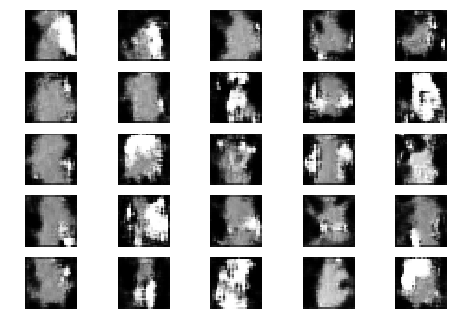

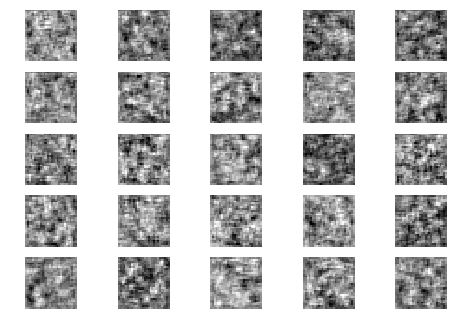

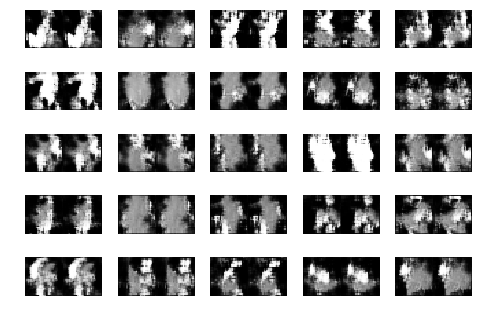

Epoch 1 Batch 1/187 [D loss: 0.494003, acc.: 81.25%] [G loss: 2.431265]
Epoch 1 Batch 2/187 [D loss: 0.511720, acc.: 75.00%] [G loss: 1.905616]
Epoch 1 Batch 3/187 [D loss: 0.475575, acc.: 68.75%] [G loss: 2.241849]
Epoch 1 Batch 4/187 [D loss: 0.340594, acc.: 87.50%] [G loss: 2.180320]
Epoch 1 Batch 5/187 [D loss: 0.466883, acc.: 71.88%] [G loss: 2.020650]
Epoch 1 Batch 6/187 [D loss: 0.434654, acc.: 71.88%] [G loss: 2.029117]
Epoch 1 Batch 7/187 [D loss: 0.597680, acc.: 71.88%] [G loss: 1.991539]
Epoch 1 Batch 8/187 [D loss: 0.826432, acc.: 56.25%] [G loss: 2.624751]
Epoch 1 Batch 9/187 [D loss: 0.739084, acc.: 56.25%] [G loss: 2.610436]
Epoch 1 Batch 10/187 [D loss: 0.952805, acc.: 59.38%] [G loss: 2.326680]
Epoch 1 Batch 11/187 [D loss: 0.585691, acc.: 71.88%] [G loss: 1.590876]
Epoch 1 Batch 12/187 [D loss: 0.453444, acc.: 78.12%] [G loss: 1.573493]
Epoch 1 Batch 13/187 [D loss: 0.472827, acc.: 78.12%] [G loss: 1.962187]
Epoch 1 Batch 14/187 [D loss: 0.412947, acc.: 81.25%] [G los

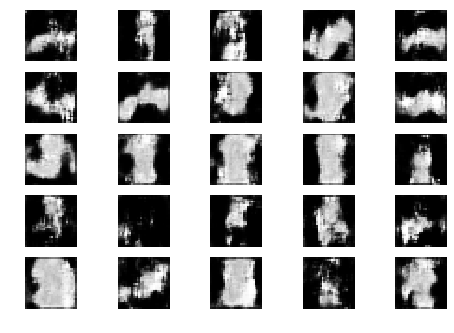

Epoch 1 Batch 101/187 [D loss: 0.364012, acc.: 84.38%] [G loss: 2.383964]


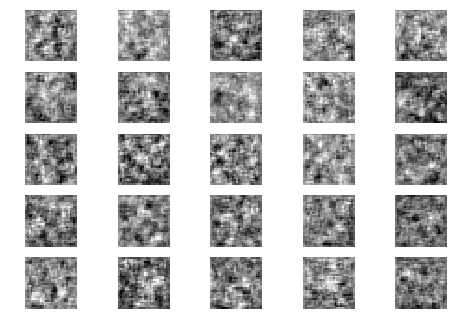

Epoch 1 Batch 102/187 [D loss: 0.513704, acc.: 75.00%] [G loss: 2.433296]


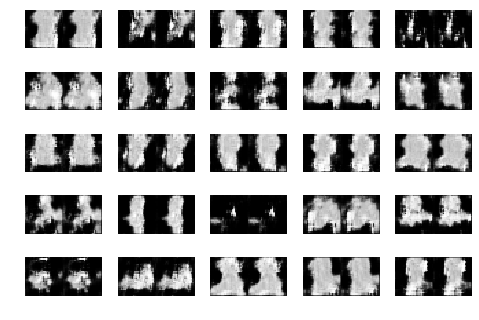

Epoch 1 Batch 103/187 [D loss: 0.371204, acc.: 84.38%] [G loss: 1.998569]
Epoch 1 Batch 104/187 [D loss: 0.483674, acc.: 87.50%] [G loss: 1.524460]
Epoch 1 Batch 105/187 [D loss: 0.274063, acc.: 90.62%] [G loss: 1.561157]
Epoch 1 Batch 106/187 [D loss: 0.539191, acc.: 75.00%] [G loss: 1.928170]
Epoch 1 Batch 107/187 [D loss: 0.622782, acc.: 71.88%] [G loss: 1.745117]
Epoch 1 Batch 108/187 [D loss: 0.514081, acc.: 81.25%] [G loss: 2.286962]
Epoch 1 Batch 109/187 [D loss: 0.409305, acc.: 78.12%] [G loss: 2.414971]
Epoch 1 Batch 110/187 [D loss: 0.547846, acc.: 75.00%] [G loss: 1.702053]
Epoch 1 Batch 111/187 [D loss: 0.450925, acc.: 87.50%] [G loss: 1.458821]
Epoch 1 Batch 112/187 [D loss: 0.341651, acc.: 78.12%] [G loss: 2.239013]
Epoch 1 Batch 113/187 [D loss: 0.391078, acc.: 78.12%] [G loss: 2.159757]
Epoch 1 Batch 114/187 [D loss: 0.288384, acc.: 90.62%] [G loss: 1.964292]
Epoch 1 Batch 115/187 [D loss: 0.575867, acc.: 71.88%] [G loss: 1.996917]
Epoch 1 Batch 116/187 [D loss: 0.55088

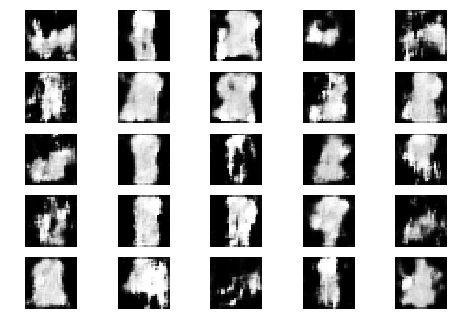

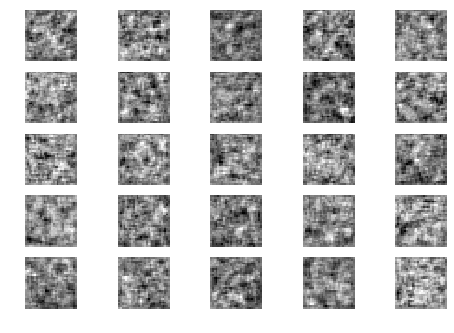

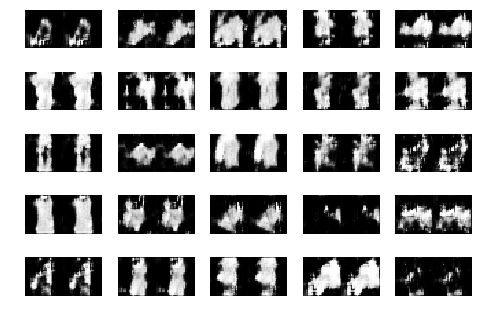

Epoch 2 Batch 1/187 [D loss: 0.784323, acc.: 62.50%] [G loss: 2.059461]
Epoch 2 Batch 2/187 [D loss: 0.300945, acc.: 87.50%] [G loss: 1.851520]
Epoch 2 Batch 3/187 [D loss: 0.162504, acc.: 100.00%] [G loss: 2.742075]
Epoch 2 Batch 4/187 [D loss: 0.356510, acc.: 81.25%] [G loss: 2.111109]
Epoch 2 Batch 5/187 [D loss: 0.489054, acc.: 78.12%] [G loss: 1.945522]
Epoch 2 Batch 6/187 [D loss: 0.384979, acc.: 81.25%] [G loss: 2.351365]
Epoch 2 Batch 7/187 [D loss: 0.758940, acc.: 56.25%] [G loss: 2.226874]
Epoch 2 Batch 8/187 [D loss: 0.454291, acc.: 84.38%] [G loss: 1.896288]
Epoch 2 Batch 9/187 [D loss: 0.557419, acc.: 68.75%] [G loss: 1.876677]
Epoch 2 Batch 10/187 [D loss: 0.277271, acc.: 81.25%] [G loss: 2.579058]
Epoch 2 Batch 11/187 [D loss: 0.533200, acc.: 71.88%] [G loss: 3.194031]
Epoch 2 Batch 12/187 [D loss: 0.343020, acc.: 81.25%] [G loss: 2.489645]
Epoch 2 Batch 13/187 [D loss: 0.288532, acc.: 84.38%] [G loss: 2.951610]
Epoch 2 Batch 14/187 [D loss: 0.275977, acc.: 93.75%] [G lo

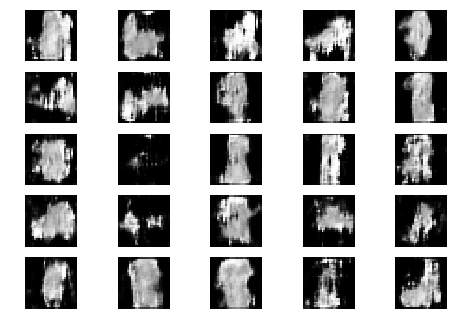

Epoch 2 Batch 101/187 [D loss: 0.557162, acc.: 65.62%] [G loss: 2.049204]


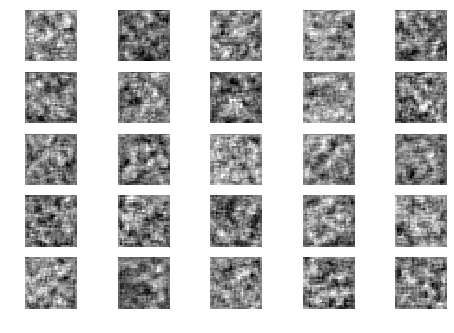

Epoch 2 Batch 102/187 [D loss: 0.377485, acc.: 78.12%] [G loss: 2.311381]


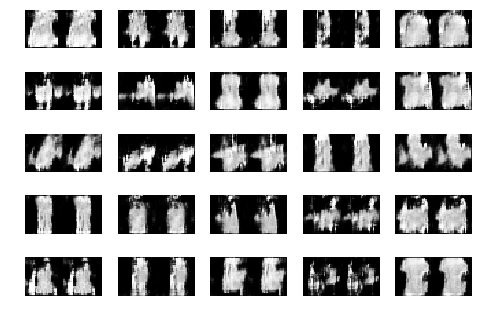

Epoch 2 Batch 103/187 [D loss: 0.456700, acc.: 71.88%] [G loss: 2.144679]
Epoch 2 Batch 104/187 [D loss: 0.295511, acc.: 81.25%] [G loss: 2.433575]
Epoch 2 Batch 105/187 [D loss: 0.452030, acc.: 81.25%] [G loss: 2.937334]
Epoch 2 Batch 106/187 [D loss: 0.404012, acc.: 81.25%] [G loss: 2.570602]
Epoch 2 Batch 107/187 [D loss: 0.420846, acc.: 75.00%] [G loss: 1.990151]
Epoch 2 Batch 108/187 [D loss: 0.469489, acc.: 78.12%] [G loss: 2.377302]
Epoch 2 Batch 109/187 [D loss: 0.378732, acc.: 90.62%] [G loss: 2.601434]
Epoch 2 Batch 110/187 [D loss: 0.392146, acc.: 87.50%] [G loss: 2.041196]
Epoch 2 Batch 111/187 [D loss: 0.332131, acc.: 87.50%] [G loss: 2.670667]
Epoch 2 Batch 112/187 [D loss: 0.156639, acc.: 96.88%] [G loss: 2.409348]
Epoch 2 Batch 113/187 [D loss: 0.362445, acc.: 78.12%] [G loss: 2.391677]
Epoch 2 Batch 114/187 [D loss: 0.398916, acc.: 87.50%] [G loss: 2.114637]
Epoch 2 Batch 115/187 [D loss: 0.373652, acc.: 78.12%] [G loss: 2.308071]
Epoch 2 Batch 116/187 [D loss: 0.34236

In [40]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain = 3)

In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
!rm -rf generator1fminst.h5



In [0]:

generator1.save('generator1fminst.h5')



In [0]:
files.download('generator1fminst.h5')


In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 2 ,  loadpretrainedweights=False)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=20, modeltotrain=2)

In [0]:
!rm -rf generator2fmnist.h5


In [0]:

generator2.save('generator2fmnist.h5')

In [0]:
!ls -al


In [0]:
files.download('generator2fmnist.h5')

In [0]:
##!wget https://github.com/rajagopalmotivate/try1/raw/master/generatorTrainedepoch2git.h5

In [0]:
!rm -rf generator1fminst.h5

In [0]:
!ls -all

In [0]:
!wget https://github.com/rajagopalmotivate/try1/raw/master/generator1fminst.h5

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
plotamodel(combined, showdetails=False )
files.download('modelsmall.png')

In [0]:
plotamodel(combined, showdetails=True )
files.download('model.png')

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=1)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=2)

In [0]:
generator1, generator2, discriminator, combined , mergedmodel = build_modelsNEW( averagemode = 3 ,  loadpretrainedweights=True)


In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1, modeltotrain=3)

In [0]:
plotamodel(combined)
files.download('model.png')

In [0]:
!rm -rf generatorTrainedepoch2.h5

generator1.save('generator1fminst.h5')

!rm -rf generator2Trainedepoch2.h5

generator2.save('generator2fminst.h5')


In [0]:
generator1 = generator1.load_weights('generator1fmnist.h5')

In [0]:
generator2 = generator2.load_weights('generator2fmnist.h5')

In [0]:
train(generator1, generator2,  discriminator, combined, mergedmodel,  epochs=2, batch_size=32, save_interval=1)

In [0]:
generator1.save('generatorTrained1epoch4.h5')

In [0]:
files.download('generator1fmnist.h5')

In [0]:
files.download('generator2fmnist.h5')

In [0]:
##files.download('discriminator1.h5')

In [0]:
##files.download('combined1.h5')

In [0]:
#generator1 = load_model('generator1.h5')
#discriminator1 = load_model('discriminator1.h5')
#combined1 = load_model('combined1.h5')

